# PyTorch 시작하기
**AIKU 학회원 여러분!** 딥러닝을 향한 여정에 발 들인 것을 환영합니다😄.

학회원 여러분이 앞으로 마주하게 될 여러 어려움들이 있을텐데, Deep Into Deep의 수업과 과제가 그 길에 조금은 도움이 되길 바랍니다.

본 과제는 CS231n, 고려대학교 딥러닝 수업 등 여러 좋은 과제들을 혼합해 만들어 졌음을 미리 알립니다. 거인의 어깨를 만들어준 여러분 감사합니다!

다시 한 번 만나서 반갑습니다! **Happy DeepLearning!**

## 왜 Deep Learning frameworks를 써야할까요?

* 우리의 Code를 GPU로 실행 시킬 수 있습니다! 이를 통해 모델을 훨씬 빠르게 훈련할 수 있습니다. PyTorch나 TensorFlow와 같은 프레임워크를 사용하면 CUDA 코드를 직접 작성할 필요 없이(이 강의의 범위를 벗어나는) 자신만의 맞춤형 신경망 아키텍처를 위해 GPU의 성능을 활용할 수 있습니다.

* 이 강의에서는 프로젝트에 이러한 프레임워크 중 하나 (PyTorch)를 사용하여 사용하려는 모든 기능을 직접 작성할 때보다 더 효율적으로 실험할 수 있도록 준비할 것입니다.

* 거인들의 어깨 위에 서 보시기 바랍니다! TensorFlow와 PyTorch는 모두 여러분의 삶을 훨씬 편하게 만들어줄 훌륭한 프레임워크이며, 이제 그 기능을 이해하셨으니 자유롭게 사용하셔도 됩니다 :)

* 마지막으로, 학계나 업계에서 접할 수 있는 딥 러닝 코드에 노출되기를 바랍니다.

## PyTorch란 무엇일까요?
numpy의 ndarray와 비슷하게 동작하는 **Tensor objects**에 대해서 동적 computational graphs를 실행하는 시스템입니다. PyTorch는 사람이 직접 backpropagation을 계산할 필요가 없이 강력한 **자동 미분** 엔진을 제공합니다.

## 어떻게 PyTorch를 배울 수 있을까요?
이 과제만으로는 PyTorch 전반을 이해하는데 어려움이 있을 수 있습니다.

여러 가지 방법이 추천되지만, 도움이 될 만한 사이트와 학습 방법을 알려드리겠습니다.

PyTorch 공식 한국어 튜토리얼 :
https://tutorials.pytorch.kr/beginner/basics/intro.html

Stanford의 PyTorch 강의 : https://github.com/jcjohnson/pytorch-examples


# GPU
`런타임 -> 런타임 유형 변경`을 클릭하고 `하드웨어 가속기` 아래에서 `GPU`를 선택하면 Colab에서 GPU 장치로 수동 전환할 수 있습니다. 런타임을 전환하면 커널이 다시 시작되므로 패키지를 가져오기 위해 다음 셀을 실행하기 전에 이 작업을 수행해야 합니다.

In [1]:
import os
import gzip
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as T



from tqdm import tqdm
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split


USE_GPU = True
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss.
print_every = 100
print('using device:', device)

using device: cuda


`using device: cuda`가 나오면 성공입니다!

## What is 'CUDA'?


> CUDA("Compute Unified Device Architecture", 쿠다)는 그래픽 처리 장치(GPU)에서 수행하는 (병렬 처리) 알고리즘을 C 프로그래밍 언어를 비롯한 산업 표준 언어를 사용하여 작성할 수 있도록 하는 GPGPU 기술이다. -Wikipedia-

GPU는 원래 그 이름에서도 알 수 있듯이 Graphic 연산을 위한 장치였습니다. 하지만 GPU가 병렬 처리를 매우 빠른 속도로 처리한다는 점에 주목하여, 일반적인 matrix 연산에 사용될 수 있는 GPGPU 기술이 제시되었습니다. NVIDA가 지원하는 CUDA를 통해 개발자들이 쉽게 GPU 상에서 병렬 처리 알고리즘을 실행할 수 있게 도와줍니다.

지금 과제는 Colab에서 진행되므로 특별히 CUDA Version을 설정해 줄 필요가 없습니다. 그렇지만, 앞으로 Local, 또는 Server에서 Deep Learning 코드를 실행하다 보면 CUDA, PyTorch 버젼과 관련된 오류를 많이 마주할 것입니다. 그럴 땐 다음과 같은 기술을 검토해 보세요.



# Google Mount

* colab에 파일을 업로드 하는 경우 colab 런타임이 끊어져버리게 되면, 다시 파일을 업로드 해야 한다는 불상사가 생기게 됩니다.
* colab에서는 google drive에 접근하여, google drive에 저장되어 있는 데이터셋에 접근할 수 있습니다.
* 이번 과제에서는 사용하지 않지만, 앞으로의 과제를 위하여 미리 알아두는 것이 좋을 것 같습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part I. 준비
이제 MNIST dataset을 활용한 Classification 과제를 시작해보겠습니다!

준비단계에서는 학습을 위한 데이터셋을 불러오고, 전처리하는 단계까지 수행할 것입니다.

## MNIST Dataset이란?

* MNIST는 간단한 컴퓨터 비전 데이터 세트로, 손으로 쓰여진 이미지들로 구성되어 있습니다.
* 인공지능 연구의 권위자 LeCun교수가 만든 데이터 셋으로, MNIST Dataset을 활용한 분류 문제는 딥러닝 생태계의 Hello, World같은 역할을 합니다.

* MNIST는 60,000개의 트레이닝 셋과 10,000개의 테스트 셋으로 이루어져 있고 이중 트레이닝 셋을 학습데이터로 사용하고 테스트 셋을 신경망을 검증하는 데에 사용합니다.

* 숫자는 0에서 9까지의 값을 가지며, 이미지의 크기는(28x28 픽셀)로 고정되어 있습니다.




이제 밑의 코드를 실행시켜 MNIST Dataset을 colab에 불러와주세요!

In [5]:
# colab에서는 !{리눅스 명령어}를 활용하여, 리눅스 명령어를 처리할 수 있습니다.
!wget https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz
!wget https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz
!wget https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz
!wget https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz

--2024-07-17 08:00:52--  https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz
Resolving ossci-datasets.s3.amazonaws.com (ossci-datasets.s3.amazonaws.com)... 3.5.22.148, 52.217.169.9, 52.216.51.217, ...
Connecting to ossci-datasets.s3.amazonaws.com (ossci-datasets.s3.amazonaws.com)|3.5.22.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  15.5MB/s    in 0.6s    

2024-07-17 08:00:53 (15.5 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2024-07-17 08:00:53--  https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz
Resolving ossci-datasets.s3.amazonaws.com (ossci-datasets.s3.amazonaws.com)... 52.216.35.113, 52.216.49.9, 52.216.32.49, ...
Connecting to ossci-datasets.s3.amazonaws.com (ossci-datasets.s3.amazonaws.com)|52.216.35.113|:443... connected.
HTTP request sent, awaiting res

## Dataset / DataLoader

딥러닝 모델을 학습시키기 위한 데이터를 불러올때 **Dataset**과 **DataLoader** 클래스를 자주 씁니다.

**Dataset**은 데이터를 로드하고 전처리하는 데 사용되는 추상 클래스입니다. 데이터를 메모리에 한 번에 모두 로드하지 않고, 필요한 부분만을 로드하여 메모리 효율성을 높입니다.
Dataset 클래스를 상속받은 CustomDataset을 만들고 싶다면, `__len__`과 `__getitem__` 메서드를 오버라이딩하여 데이터의 크기와 각 샘플에 접근할 수 있는 방법을 정의해주어야 합니다.
Dataset class를 통해 데이터셋을 정의하면, 데이터를 불러올 때 필요한 전처리 작업을 포함하여 데이터에 쉽게 접근하고 조작할 수 있습니다.

DataLoader는 Dataset 객체를 감싸고, 배치(batch) 단위로 데이터를 모델에 공급할 수 있도록 해줍니다.
이는 대량의 데이터를 처리할 때 매우 유용하며, 훈련 속도를 크게 향상시킵니다.
DataLoader는 데이터 샘플링, 셔플링, 병렬 처리를 지원하여 모델 훈련 과정에서 효율성을 극대화합니다.

### 문제 1

코드의 빈칸을 채워주세요.

In [2]:
class CustomDataset(Dataset):
  def __init__(self, istrain, trans = None, path = '/content/'):
    '''
      inputs:
        - istrain : train mode인지 확인
        - trans : 데이터 전처리 및 데이터 증강을 위한 함수
        - path : 데이터셋이 저장되어 있는 폴더 경로
    '''
    self.trans = trans

    if istrain:
      image_path = os.path.join(path, 'train-images-idx3-ubyte.gz')
      label_path = os.path.join(path, 'train-labels-idx1-ubyte.gz')
    else:
      image_path = os.path.join(path, 't10k-images-idx3-ubyte.gz')
      label_path = os.path.join(path, 't10k-labels-idx1-ubyte.gz')

    with gzip.open(image_path, 'rb') as f:
      # self.images는 모든 이미지를 담고 있는 변수입니다.
      self.images = np.frombuffer(f.read(), np.uint8, offset=16)
      self.images = self.images.reshape(-1, 1, 28, 28)

    with gzip.open(label_path, 'rb') as f:
      # self.labels는 모든 라벨을 담고 있는 변수입니다.
      self.labels = np.frombuffer(f.read(), np.uint8, offset=8)

  def __len__(self):

    ###########################################################################
    # __len__(self) 함수는 데이터의 크기를 받아오는 함수입니다.               #
    # self.images나 self.labels를 활용하여 전체 데이터의 크기를 반환해주세요. #
    ###########################################################################
    # FILL YOUR CODE HERE
    return len(self.images)

    ###########################################################################


  def __getitem__(self, idx):
    ###########################################################################
    # __getitem__(self, idx) 함수는 idx번째 데이터를 가져오는 함수입니다.     #
    # self.images와 self.labels를 활용하여 idx번째 image와 label을 반환하세요.#
    ###########################################################################
    # FILL YOUR CODE HERE
    image = self.images[idx]
    label = self.labels[idx]

    ###########################################################################
    if self.trans:
      image = self.trans(image)

    return image, label

In [3]:
# 이미지를 텐서로 바꾸고, 적당한 값으로 바꿔주기 위해 필요한 함수입니다.
transform = T.Compose([T.ToTensor(), T.Normalize((0.5,), (0.5,))])

In [6]:
train_dataset = CustomDataset(trans = transform, istrain = True)
test_dataset = CustomDataset(trans = transform, istrain = False)

데이터셋의 개수를 확인해보세요!

In [8]:
print(f"Number of train dataset: {len(train_dataset)}")
print(f"Number of test dataset: {len(test_dataset)}")

Number of train dataset: 60000
Number of test dataset: 10000


### 문제 2

* 딥러닝 데이터에서는 train, test dataset이외에도 validation dataset이라는 것이 있습니다. (강의 자료 참고)

* validation dataset이 직접적으로 주어지지 않으면, 보통 train dataset에서 일부를 떼어와서 사용합니다.

* pytorch에서 제공하는 `random_split`이라는 함수를 활용하여, 직접 train dataset과 validation dataset을 8:2 비율로 나눠주세요!

* `random_split` Documentation : https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split

In [7]:
train_size = len(train_dataset) * 0.8 # FILL YOUR CODE HERE
val_size = len(train_dataset) * 0.2 # FILL YOUR CODE HERE
train_dataset, val_dataset = random_split(train_dataset, [int(train_size), int(val_size)])# FILL YOUR CODE HERE

In [10]:
print(f"Number of train dataset: {len(train_dataset)}")
print(f"Number of valid dataset: {len(val_dataset)}")

Number of train dataset: 48000
Number of valid dataset: 12000


### 문제 3

* `DataLoader`를 사용하여 데이터를 batch 단위로 불러올 수 있게 합니다.
* 비어있는 부분을 채워주세요!
* `DataLoader` Documentation : https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [8]:
'''
train dataloader는 batch size가 64이며, 데이터셋이 랜덤으로 섞여 반환됩니다.
val dataloader와 test dataloader는 batch size가 32이며, 데이터셋이 섞이지 않고 반환됩니다.
'''
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)# FILL YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)# FILL YOUR CODE HERE
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)# FILL YOUR CODE HERE

### 문제 4, 5

* 다음 코드들을 실행하고, 자신의 생각을 적는 란에 자유롭게 자신의 생각을 적어주세요

---
MNIST Dataset의 image를 label 별로 출력하는 코드입니다.

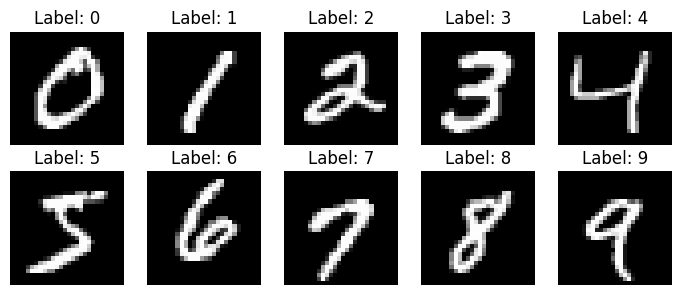

In [10]:
def get_samples_per_class(images, labels):
    samples = {}
    for img, lbl in zip(images, labels):
        if lbl not in samples:
            samples[lbl] = img
        if len(samples) == 10:
            break
    return samples

tmp_dataset = CustomDataset(istrain = True)
samples = get_samples_per_class(tmp_dataset.images, tmp_dataset.labels)

sorted_samples = sorted(samples.items())

fig, axes = plt.subplots(2, 5, figsize=(7, 3))
for i, (label, image) in enumerate(sorted_samples):
    ax = axes[i // 5, i % 5]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

MNIST Dataset의 label별 분포를 출력하는 함수입니다.

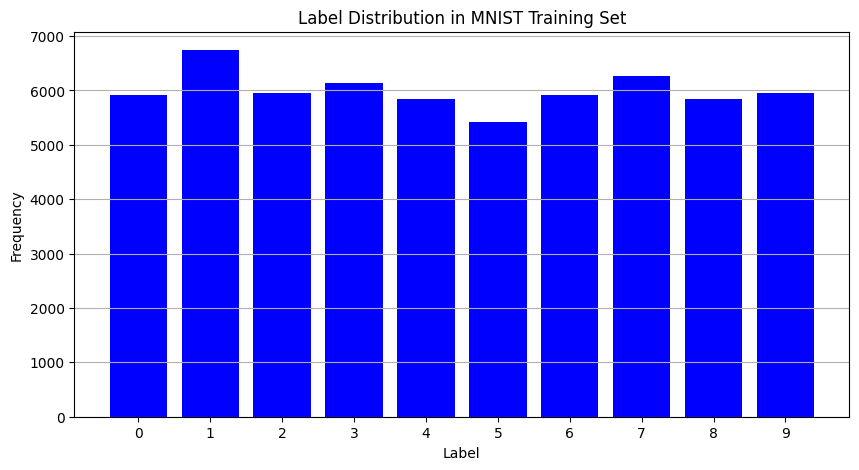

In [11]:
unique, counts = np.unique(tmp_dataset.labels, return_counts=True)
label_distribution = dict(zip(unique, counts))

plt.figure(figsize=(10, 5))
plt.bar(label_distribution.keys(), label_distribution.values(), color='blue')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution in MNIST Training Set')
plt.xticks(np.arange(10))
plt.grid(axis='y')

plt.show()


**문제 4**

다음 분포는 모델이 숫자를 인식하는 데에 있어 적합한 학습 데이터셋의 분포일까요?
이유와 함께 말씀해주세요.

* 답 : 네
* 이유 : label의 분포가 고르기 때문입니다.

MNIST Dataset의 label별 평균 이미지의 모습을 출력하는 코드입니다.

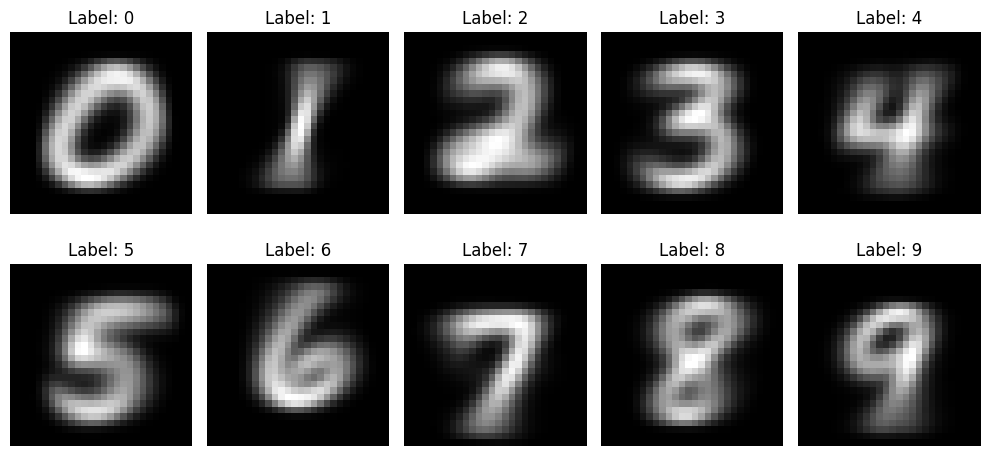

In [12]:
mean_images = {}
for label in range(10):
    mean_images[label] = tmp_dataset.images[tmp_dataset.labels == label].mean(axis=0)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, (label, mean_image) in enumerate(mean_images.items()):
    ax = axes[i // 5, i % 5]
    ax.imshow(mean_image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Random으로 2000개의 image를 불러와서 image feature의 차원을 축소하여 2차원 평면에 나타낸 결과입니다.

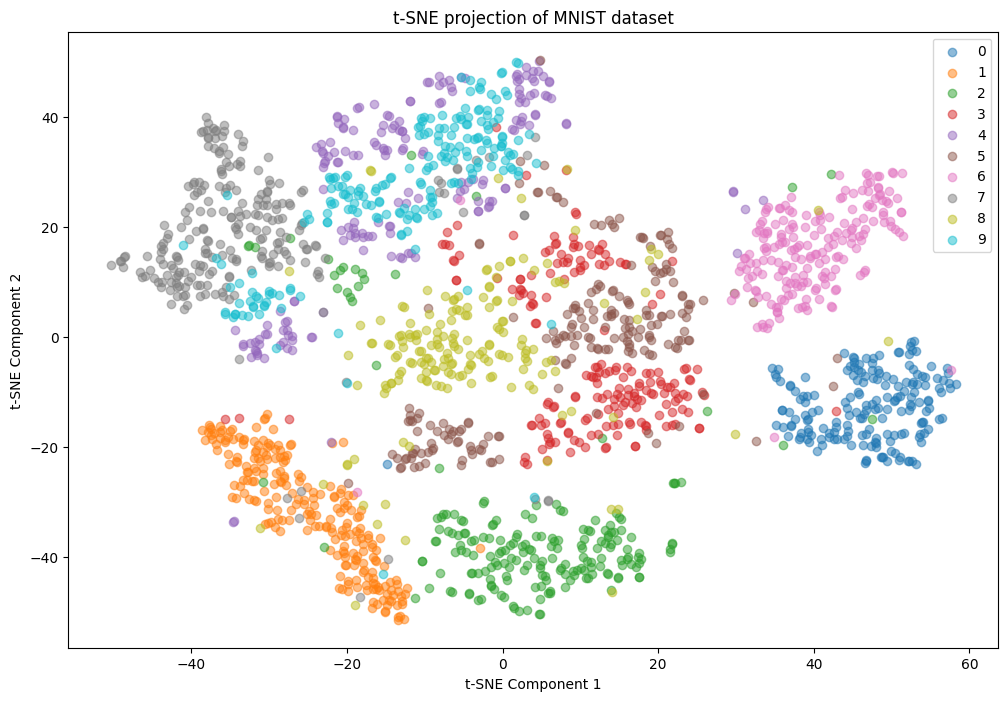

In [13]:
n_samples = 2000
indices = np.random.choice(len(tmp_dataset.images), n_samples, replace=False)
images_subset = tmp_dataset.images[indices].reshape(n_samples, -1)
labels_subset = tmp_dataset.labels[indices]

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(images_subset)

plt.figure(figsize=(12, 8))
for label in np.unique(labels_subset):
    indices = labels_subset == label
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=label, alpha=0.5)
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE projection of MNIST dataset')
plt.show()


**문제 5**

실행 결과를 통해 데이터셋에 대해 알 수 있는 점을 2가지 이상 적어주세요.

1.   같은 label이면 그 분포가 밀집되어 있다.
2.   9와 4의 분포가 겹치는 것을 보아 9와 4를 잘 구별 못 한다.

---

# Part II. BackPropagation 이해하기

딥러닝에서는 모델을 학습시키기 위해 BackPropagation 이라는 것을 활용합니다. 딥러닝의 학습에 굉장히 중요한 역할을 하는 것인 만큼, 편미분, Chain Rule에 대한 간략한 설명과 일부 함수를 직접 구현해보는 기회를 가져보고자 합니다.

## 편미분

* 실제 딥러닝에서는 하나의 변수만을 사용하는 것이 아닌 2개 이상의 변수를 사용하기 때문에, 편미분을 사용합니다.
* 편미분은 $d$ 대신 $\partial$ 기호를 사용하며, 변수가 2개 이상임에 유의해주시기 바랍니다.
* $x_0$와 $x_1$이 변수로 주어질 때, $\frac{\partial f(x_0, x_1)}{\partial x_0}$는 $x_0$를 변수로 보고, 나머지 변수들은 모두 상수로 본 채 미분을 한다고 생각하시면 됩니다.
* Example

\begin{align}
  f(x_0, x_1) = x_0^2 + x_1^2 + x_0x_1 \\
  \\
  \frac{\partial f(x_0, x_1)}{\partial x_0} = 2x_0 + x_1
\end{align}

In [14]:
def numerical_diff(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
      tmp_val = x[idx]
      x[idx] = tmp_val + h
      fxh1 = f(x)

      x[idx] = tmp_val - h
      fxh2 = f(x)

      grad[idx] = (fxh1 - fxh2) / (2*h)
      x[idx] = tmp_val


  return grad

def function(x):
  return x[0]**2 + x[1]**2 + x[0]*x[1]

x = np.array([4., 5.])
numerical_diff(function, x)

array([13., 14.])

## Chain rule

딥러닝에서 연쇄 법칙(Chain Rule)은 역전파(backpropagation)를 수행하는 데 매우 중요한 역할을 합니다. 역전파 알고리즘은 신경망을 학습시키기 위해 사용되며, 출력 층에서 입력 층으로 오차를 전파하면서 각 층의 기울기를 계산합니다. 합성 함수 $f(g(x))$에 대해 연쇄 법칙은 다음과 같이 표현됩니다.

\begin{align}
  \frac{d}{dx}f(g(x))
  = \frac{dg(x)}{dx} \cdot \frac{df(g(x))}{dg(x)}
\end{align}


이는 손실 함수의 입력에 대한 기울기를 각 층의 기울기를 곱하여 계산할 수 있음을 의미합니다. 다음 코드는 연쇄 법칙을 적용한 경우와 적용하지 않은 경우의 미분을 비교하는 예제입니다.

In [15]:
def g(x):
    return x**2

def f(u):
    return np.sin(u)

def composite_function(x):
    return f(g(x))

def chain_rule_derivative(x):
    u = g(x)
    df_du = numerical_diff(f, u)
    du_dx = numerical_diff(g, x)
    return du_dx * df_du

def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

x = np.array([2.0])
chain_rule_result = chain_rule_derivative(x)
numerical_result = numerical_diff(composite_function, x)

print(f"result of chain rule derivative : {chain_rule_result}")
print(f"result of numerical differentiation : {numerical_result}")


result of chain rule derivative : [-2.61457448]
result of numerical differentiation : [-2.61457438]


## 밑바닥부터 구현하기

### Flatten
PyTorch Tensors는 개념적으로 n차원 배열과 유사합니다. n차원 숫자 그리드이며, PyTorch는 n차원 배열과 마찬가지로 텐서에서 효율적으로 작동할 수 있는 많은 함수를 제공합니다. 간단한 예로, 아래에서는 완전히 연결된 신경망에서 사용할 수 있도록 이미지 데이터를 재구성하는 `flatten` 함수를 제공합니다.

이미지 데이터는 일반적으로 N x C x H x W 형태의 텐서에 저장된다는 점을 기억하세요:

* N은 데이터 포인트의 수입니다.
* C는 채널 수입니다.
* H는 중간 특징 맵의 픽셀 단위 높이입니다.
* W는 중간 피처 맵의 높이(픽셀)입니다.

이는 2D convolution 같이 중간 특징이 서로 상대적인 위치에 대한 공간적 이해가 필요한 작업을 수행할 때 데이터를 표현하는 데 적합한 방법입니다. 그러나 fully connected affine layers를 사용하여 이미지를 처리할 때는 각 데이터 포인트를 단일 벡터로 표현해야 하므로 데이터의 여러 채널, 행, 열을 분리하는 것은 더 이상 유용하지 않습니다. 따라서 'flatten' 연산을 사용하여 표현당 `C x H x W` 값을 하나의 긴 벡터로 축소합니다. 아래의 flatten 함수는 먼저 주어진 데이터 배치에서 N, C, H, W 값을 읽은 다음 해당 데이터의 'view'를 반환합니다. "view"는 numpy의 "reshape" 메서드와 유사합니다. x의 차원을 N x ?? 로 재형성하며, 여기서 ?? 는 무엇이든 허용됩니다(이 경우 C x H x W가 되지만 명시적으로 지정할 필요는 없습니다).

In [16]:
def flatten(x):
    N = x.shape[0]
    return x.view(N, -1)

def test_flatten():
    x = torch.arange(12).view(2, 1, 3, 2)
    print('Before flattening: ', x)
    print('After flattening: ', flatten(x))

test_flatten()

Before flattening:  tensor([[[[ 0,  1],
          [ 2,  3],
          [ 4,  5]]],


        [[[ 6,  7],
          [ 8,  9],
          [10, 11]]]])
After flattening:  tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])


### Sigmoid

Sigmoid는 Gradient Vanishing 문제 때문에 딥러닝에서 많이 활용되지 못하고 있지만, 단순한 task에서는 아직까지 쓰이고 있습니다. Sigmoid 함수의 forward 및 backward 식은 다음과 같습니다. (backward는 직접 미분하면서 증명해보세요!)

**forward**

\begin{align}
  y = \sigma(x) = \frac{1}{1 + \mbox{exp}(-x)}
\end{align}

**backward**
\begin{align}
  \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x} = dout \cdot \sigma(x) \cdot (1 - \sigma(x))
\end{align}

In [17]:
class Sigmoid():
  def __init__(self):
    self.y = None

  def forward(self, x):
    y = 1 / (1+torch.exp(-x))
    self.y = y
    return y

  def backward(self, dout):
    return dout * (1-self.y) * self.y


### 문제 6. ReLU

ReLU는 딥러닝에서 가장 많이 사용하는 활성화 함수 중 하나입니다. ReLU의 forward와 backward 식은 다음과 같습니다.

\\

**forward**
\begin{align}
  y =
  \begin{cases}
    0, & x \leq 0\\
    x, & x > 0
  \end{cases}
\end{align}

\\

**backward**
\begin{align}
  \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x} =
  \begin{cases}
    0, & x \leq 0\\
    dout, & x > 0
  \end{cases}
\end{align}

\\

Sigmoid 예시를 보고, ReLU의 forward, backward 빈칸을 채워주세요.

In [18]:
class ReLU():
  def __init__(self):
    self.mask = None

  def forward(self, x):
    # FILL YOUR CODE HERE

    self.mask = (x > 0 )
    out = x * self.mask
    return out

  def backward(self, dout):
    # FILL YOUR CODE HERE
    dx = dout * self.mask

    return dx

### 문제 7. Linear

`Linear`는 PyTorch에서 자주 사용되는 레이어로, 입력 데이터를 선형 변환하는 역할을 합니다. 선형 변환은 다음과 같은 수식으로 표현됩니다:

**forward**
\begin{align}
\mathbf{y} = \mathbf{x}W + \mathbf{b}
\end{align}

**backward**

\begin{align}
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial W} = x^T \cdot dout \\
\\
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial b} = \sum_{i=1}^{N} dout_i \\
\\
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x} = dout \cdot W^T
\end{align}

여기서 x는 입력 벡터, W는 가중치 행렬, b는 편향 벡터입니다.



In [19]:
class Linear:
  def __init__(self, input_dim, output_dim):
    self.W = np.random.randn(input_dim, output_dim) * 0.01
    self.b = np.zeros(output_dim)
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    # FILL YOUR CODE HERE
    self.x = x
    out = np.dot(x, self.W) + self.b

    return out

  def backward(self, dout):
    # FILL YOUR CODE HERE
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis = 0)
    dx = np.dot(dout, self.W.T)

    return dx

### 문제 8. CrossEntropyLoss

교차 엔트로피 손실은 분류 문제에서 모델의 성능을 평가하는 데 사용되는 손실 함수입니다. 이 함수는 모델이 예측한 확률 분포와 실제 타겟 분포 간의 차이를 측정합니다.

**Softmax Function**

* 소프트맥스 함수는 모델의 출력 로짓 값을 확률 분포로 변환합니다. 각 입력 값의 지수 함수를 계산한 후, 이 값들의 합으로 나누어 확률로 변환합니다.

\begin{align}
	\mbox{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}} = \frac{e^{(z_i - c)}}{\sum_{j} e^{(z_j - c)}}
\end{align}

* 여기서 $z_i$는 입력 벡터의 i번째 원소입니다. 각 원소의 지수 값을 계산한 후 이 지수 값들의 합으로 나누어 각 원소를 확률로 변환합니다.

**Cross Entropy Calculation - forward**
* 교차 엔트로피 손실은 예측된 확률 분포와 실제 타겟 분포 간의 차이를 계산합니다. 실제 타겟 값의 원-핫 인코딩 벡터와 소프트맥스 출력 값을 사용하여 손실을 계산합니다.

\begin{align}
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic})
\end{align}

* 여기서:
  * $N$은 배치 크기
  * $C$는 클래스의 수
  * $y_{ic}$는 i번째 샘플의 실제 클래스의 원-핫 인코딩 값
  * $\hat{y}_{ic}$는 i번째 샘플의 소프트맥스 출력 값

**backward**
* 역전파를 통해 손실 함수에 대한 그래디언트를 계산합니다. 각 로짓 값에 대한 그래디언트는 다음과 같은 수식으로 계산됩니다.

\begin{align}
\frac{\partial L}{\partial z_{i}} = \frac{1}{N} (\hat{y}_{i} - y_{i})
\end{align}

* 여기서:
  * $\hat{y}_{i}$는 소프트맥스 출력 값
  * $y_{i}$는 실제 타겟 값

* 이 수식을 통해 각 로짓 값에 대한 그래디언트를 계산하여 역전파를 수행합니다.


In [20]:
class CrossEntropyLoss:
    def __init__(self):
        self.softmax_value = None
        self.pred = None
        self.target = None

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def to_one_hot(self, y, batch_size, num_classes):
        one_hot = np.zeros((batch_size, num_classes))
        one_hot[np.arange(batch_size), y] = 1
        return one_hot

    def forward(self, pred, target):
        """
        CrossEntropyLoss의 forward 패스.

        Inputs:
          - pred (numpy.ndarray): 예측한 로짓 값.
          - target (numpy.ndarray): 실제 타겟 값 (원-핫 인코딩 형식).

        Returns:
          - loss: 배치에 대한 평균 교차 엔트로피 손실.
        """
        batch_size, num_classes = pred.shape

        self.pred = pred
        self.target = self.to_one_hot(target, batch_size, num_classes)

        # FILL YOUR CODE HERE
        loss = 0
        self.softmax_value = self.softmax(self.pred)
        for i in range(batch_size):
          for j in range(num_classes):
            loss += self.target[i, j] * np.log(self.softmax_value[i, j] + 1e-15)


        loss = -loss / batch_size
        return loss

    def backward(self, dout):
        """
        CrossEntropyLoss의 backward 패스.

        Inputs:
          - dout : 1

        Returns:
          - grad: 예측값에 대한 그래디언트.
        """
        # FILL YOUR CODE HERE
        batchsize = self.pred.shape[0]
        grad = (self.softmax_value - self.target ) / batchsize

        return grad

### SGD

In [21]:
class SGD:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate

  def step(self, params, grads):
    for key in params.keys():
      params[key] -= self.learning_rate * grads[key]

### 문제 9. 전체 학습 코드

In [22]:
from collections import OrderedDict

class ThreeLayerNet:

  def __init__(self, input_dim, hidden_dims, output_dim):
    self.params = {}
    self.layers = OrderedDict()

    self.layers['fc1'] = Linear(input_dim, hidden_dims[0])
    self.layers['relu1'] = ReLU()
    self.layers['fc2'] = Linear(hidden_dims[0], hidden_dims[1])
    self.layers['relu2'] = ReLU()
    self.layers['fc3'] = Linear(hidden_dims[1], output_dim)

    self.params['W1'] = self.layers['fc1'].W
    self.params['b1'] = self.layers['fc1'].b
    self.params['W2'] = self.layers['fc2'].W
    self.params['b2'] = self.layers['fc2'].b
    self.params['W3'] = self.layers['fc3'].W
    self.params['b3'] = self.layers['fc3'].b

    self.last_layer = CrossEntropyLoss()

  def predict(self, x):
    '''
    flatten을 사용하여 tensor를 2차원으로 만들고, self.layers에 있는 layer들을 사용하여, output을 만들어주세요!
    '''

    # FILL YOUR CODE HERE
    tensor = torch.tensor(x)
    #print(tensor.shape)
    tensor_flatten = tensor.flatten(1,3)
    #print(tensor_flatten.shape)

    out1 = self.layers['fc1'].forward(tensor_flatten)
    relu1 = self.layers['relu1'].forward(out1)
    out2 = self.layers['fc2'].forward(relu1)
    relu2 = self.layers['relu2'].forward(out2)
    out3 = self.layers['fc3'].forward(relu2)
    out = out3

    return out

  def loss(self, y, t):
    return self.last_layer.forward(y, t)

  def accuracy(self, y, t):
    y = np.argmax(y, axis = 1)
    accuracy = np.sum(y == t) / float(t.shape[0])

    return accuracy

  def gradient(self):

    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads = {}


    grads['W1'] = self.layers['fc1'].dW

    '''
    위의 예시처럼 grads에 각각의 parameter의 gradient값을 dictionary 형태로 저장해주세요.
    '''

    # FILL YOUR CODE HERE
    grads['b1'] = self.layers['fc1'].db
    grads['W2'] = self.layers['fc2'].dW
    grads['b2'] = self.layers['fc2'].db
    grads['W3'] = self.layers['fc3'].dW
    grads['b3'] = self.layers['fc3'].db
    return grads

In [23]:
optimizer = SGD(learning_rate = 0.0001)
model = ThreeLayerNet(input_dim = 784, hidden_dims = [256, 64], output_dim=10)

In [24]:
for epoch in range(10):
  for idx, data in enumerate(tqdm(train_dataloader)):
    images, labels = data
    labels = labels.numpy()

    output = model.predict(images)
    loss = model.loss(output, labels)
    grads = model.gradient()
    optimizer.step(model.params, grads)
    train_acc = model.accuracy(output, labels)

    if idx % 100 == 0:
      print("[Model 1] Epoch: {} Train Loss: {:.4f} Train Accuracy: {:.4f}".format(epoch+1, loss, train_acc))

  for data in tqdm(val_dataloader):
    images, labels = data
    labels = labels.numpy()
    output = model.predict(images)
    val_acc = model.accuracy(output, labels)

  print("[Model 1] Epoch: {} Valid Accuracy: {:.4f}".format(epoch+1, val_acc))




  0%|          | 0/750 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
<ipython-input-22-a2b3fc8dd980>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(x)
  1%|          | 8/750 [00:00<00:19, 37.99it/s]

[Model 1] Epoch: 1 Train Loss: 2.3025 Train Accuracy: 0.1094


 14%|█▍        | 107/750 [00:02<00:12, 50.00it/s]

[Model 1] Epoch: 1 Train Loss: 2.3024 Train Accuracy: 0.0469


 28%|██▊       | 208/750 [00:04<00:12, 44.39it/s]

[Model 1] Epoch: 1 Train Loss: 2.3024 Train Accuracy: 0.0469


 41%|████▏     | 311/750 [00:06<00:08, 51.18it/s]

[Model 1] Epoch: 1 Train Loss: 2.3027 Train Accuracy: 0.0312


 55%|█████▍    | 409/750 [00:08<00:06, 51.92it/s]

[Model 1] Epoch: 1 Train Loss: 2.3026 Train Accuracy: 0.0938


 67%|██████▋   | 504/750 [00:12<00:12, 20.02it/s]

[Model 1] Epoch: 1 Train Loss: 2.3025 Train Accuracy: 0.0469


 81%|████████  | 609/750 [00:14<00:02, 50.45it/s]

[Model 1] Epoch: 1 Train Loss: 2.3027 Train Accuracy: 0.0312


 94%|█████████▍| 705/750 [00:16<00:00, 48.31it/s]

[Model 1] Epoch: 1 Train Loss: 2.3028 Train Accuracy: 0.0156


100%|██████████| 375/375 [00:02<00:00, 140.80it/s]


[Model 1] Epoch: 1 Valid Accuracy: 0.0625


  1%|          | 4/750 [00:00<00:19, 38.56it/s]

[Model 1] Epoch: 2 Train Loss: 2.3023 Train Accuracy: 0.0781


 14%|█▍        | 108/750 [00:02<00:12, 49.43it/s]

[Model 1] Epoch: 2 Train Loss: 2.3024 Train Accuracy: 0.0469


 27%|██▋       | 204/750 [00:05<00:23, 23.46it/s]

[Model 1] Epoch: 2 Train Loss: 2.3024 Train Accuracy: 0.1094


 41%|████      | 308/750 [00:08<00:08, 49.77it/s]

[Model 1] Epoch: 2 Train Loss: 2.3024 Train Accuracy: 0.1250


 54%|█████▍    | 406/750 [00:10<00:06, 50.51it/s]

[Model 1] Epoch: 2 Train Loss: 2.3027 Train Accuracy: 0.0781


 68%|██████▊   | 511/750 [00:12<00:05, 46.62it/s]

[Model 1] Epoch: 2 Train Loss: 2.3026 Train Accuracy: 0.1094


 81%|████████▏ | 611/750 [00:14<00:02, 52.14it/s]

[Model 1] Epoch: 2 Train Loss: 2.3024 Train Accuracy: 0.0938


 95%|█████████▍| 710/750 [00:16<00:00, 51.25it/s]

[Model 1] Epoch: 2 Train Loss: 2.3026 Train Accuracy: 0.1250


100%|██████████| 375/375 [00:04<00:00, 91.28it/s] 


[Model 1] Epoch: 2 Valid Accuracy: 0.1250


  1%|          | 6/750 [00:00<00:13, 53.99it/s]

[Model 1] Epoch: 3 Train Loss: 2.3024 Train Accuracy: 0.1250


 14%|█▍        | 108/750 [00:02<00:12, 49.43it/s]

[Model 1] Epoch: 3 Train Loss: 2.3025 Train Accuracy: 0.1250


 28%|██▊       | 208/750 [00:04<00:10, 50.49it/s]

[Model 1] Epoch: 3 Train Loss: 2.3024 Train Accuracy: 0.1250


 41%|████      | 308/750 [00:06<00:08, 49.21it/s]

[Model 1] Epoch: 3 Train Loss: 2.3026 Train Accuracy: 0.0625


 54%|█████▍    | 407/750 [00:08<00:06, 51.54it/s]

[Model 1] Epoch: 3 Train Loss: 2.3021 Train Accuracy: 0.1875


 67%|██████▋   | 504/750 [00:11<00:11, 21.47it/s]

[Model 1] Epoch: 3 Train Loss: 2.3020 Train Accuracy: 0.1875


 81%|████████▏ | 610/750 [00:14<00:02, 51.48it/s]

[Model 1] Epoch: 3 Train Loss: 2.3027 Train Accuracy: 0.0781


 95%|█████████▍| 711/750 [00:16<00:00, 52.86it/s]

[Model 1] Epoch: 3 Train Loss: 2.3024 Train Accuracy: 0.0938


100%|██████████| 375/375 [00:02<00:00, 136.97it/s]


[Model 1] Epoch: 3 Valid Accuracy: 0.1250


  1%|          | 5/750 [00:00<00:16, 44.92it/s]

[Model 1] Epoch: 4 Train Loss: 2.3024 Train Accuracy: 0.1406


 14%|█▍        | 108/750 [00:02<00:13, 48.67it/s]

[Model 1] Epoch: 4 Train Loss: 2.3025 Train Accuracy: 0.1250


 27%|██▋       | 204/750 [00:05<00:23, 23.09it/s]

[Model 1] Epoch: 4 Train Loss: 2.3023 Train Accuracy: 0.1562


 41%|████      | 307/750 [00:08<00:09, 47.47it/s]

[Model 1] Epoch: 4 Train Loss: 2.3024 Train Accuracy: 0.1562


 54%|█████▍    | 407/750 [00:10<00:06, 50.72it/s]

[Model 1] Epoch: 4 Train Loss: 2.3026 Train Accuracy: 0.0625


 68%|██████▊   | 509/750 [00:12<00:04, 51.98it/s]

[Model 1] Epoch: 4 Train Loss: 2.3028 Train Accuracy: 0.0625


 81%|████████  | 609/750 [00:14<00:02, 52.05it/s]

[Model 1] Epoch: 4 Train Loss: 2.3029 Train Accuracy: 0.0625


 94%|█████████▍| 708/750 [00:16<00:00, 44.84it/s]

[Model 1] Epoch: 4 Train Loss: 2.3022 Train Accuracy: 0.0938


100%|██████████| 375/375 [00:03<00:00, 95.80it/s] 


[Model 1] Epoch: 4 Valid Accuracy: 0.1250


  1%|          | 6/750 [00:00<00:14, 51.95it/s]

[Model 1] Epoch: 5 Train Loss: 2.3025 Train Accuracy: 0.1250


 15%|█▍        | 109/750 [00:02<00:13, 47.79it/s]

[Model 1] Epoch: 5 Train Loss: 2.3025 Train Accuracy: 0.0938


 27%|██▋       | 206/750 [00:04<00:11, 49.15it/s]

[Model 1] Epoch: 5 Train Loss: 2.3019 Train Accuracy: 0.2188


 41%|████      | 307/750 [00:06<00:08, 50.56it/s]

[Model 1] Epoch: 5 Train Loss: 2.3026 Train Accuracy: 0.0938


 54%|█████▎    | 403/750 [00:08<00:06, 52.24it/s]

[Model 1] Epoch: 5 Train Loss: 2.3024 Train Accuracy: 0.1406


 68%|██████▊   | 510/750 [00:12<00:07, 33.59it/s]

[Model 1] Epoch: 5 Train Loss: 2.3021 Train Accuracy: 0.1562


 81%|████████  | 609/750 [00:14<00:02, 51.24it/s]

[Model 1] Epoch: 5 Train Loss: 2.3030 Train Accuracy: 0.0625


 94%|█████████▍| 704/750 [00:16<00:00, 50.79it/s]

[Model 1] Epoch: 5 Train Loss: 2.3021 Train Accuracy: 0.1250


100%|██████████| 375/375 [00:02<00:00, 135.98it/s]


[Model 1] Epoch: 5 Valid Accuracy: 0.1250


  1%|          | 5/750 [00:00<00:14, 49.91it/s]

[Model 1] Epoch: 6 Train Loss: 2.3025 Train Accuracy: 0.0938


 14%|█▍        | 104/750 [00:02<00:13, 49.63it/s]

[Model 1] Epoch: 6 Train Loss: 2.3023 Train Accuracy: 0.1094


 28%|██▊       | 209/750 [00:06<00:14, 36.74it/s]

[Model 1] Epoch: 6 Train Loss: 2.3022 Train Accuracy: 0.1094


 41%|████      | 307/750 [00:08<00:08, 49.86it/s]

[Model 1] Epoch: 6 Train Loss: 2.3017 Train Accuracy: 0.1875


 54%|█████▍    | 407/750 [00:10<00:06, 49.22it/s]

[Model 1] Epoch: 6 Train Loss: 2.3028 Train Accuracy: 0.0625


 68%|██████▊   | 509/750 [00:12<00:04, 49.19it/s]

[Model 1] Epoch: 6 Train Loss: 2.3022 Train Accuracy: 0.1094


 81%|████████▏ | 610/750 [00:14<00:02, 49.05it/s]

[Model 1] Epoch: 6 Train Loss: 2.3022 Train Accuracy: 0.1562


 94%|█████████▍| 704/750 [00:16<00:01, 29.75it/s]

[Model 1] Epoch: 6 Train Loss: 2.3020 Train Accuracy: 0.1719


100%|██████████| 375/375 [00:03<00:00, 105.36it/s]


[Model 1] Epoch: 6 Valid Accuracy: 0.1250


  1%|          | 6/750 [00:00<00:14, 52.61it/s]

[Model 1] Epoch: 7 Train Loss: 2.3024 Train Accuracy: 0.0625


 14%|█▍        | 107/750 [00:02<00:12, 51.12it/s]

[Model 1] Epoch: 7 Train Loss: 2.3020 Train Accuracy: 0.1250


 28%|██▊       | 208/750 [00:04<00:11, 49.08it/s]

[Model 1] Epoch: 7 Train Loss: 2.3023 Train Accuracy: 0.0625


 41%|████      | 309/750 [00:06<00:08, 51.34it/s]

[Model 1] Epoch: 7 Train Loss: 2.3023 Train Accuracy: 0.1250


 54%|█████▎    | 403/750 [00:08<00:10, 31.77it/s]

[Model 1] Epoch: 7 Train Loss: 2.3022 Train Accuracy: 0.1094


 67%|██████▋   | 506/750 [00:12<00:05, 42.66it/s]

[Model 1] Epoch: 7 Train Loss: 2.3024 Train Accuracy: 0.0625


 81%|████████  | 609/750 [00:14<00:02, 50.99it/s]

[Model 1] Epoch: 7 Train Loss: 2.3019 Train Accuracy: 0.0938


 94%|█████████▍| 707/750 [00:16<00:00, 50.84it/s]

[Model 1] Epoch: 7 Train Loss: 2.3032 Train Accuracy: 0.0312


100%|██████████| 375/375 [00:02<00:00, 133.38it/s]


[Model 1] Epoch: 7 Valid Accuracy: 0.1250


  1%|          | 5/750 [00:00<00:15, 48.54it/s]

[Model 1] Epoch: 8 Train Loss: 2.3027 Train Accuracy: 0.0625


 14%|█▍        | 104/750 [00:02<00:24, 26.33it/s]

[Model 1] Epoch: 8 Train Loss: 2.3022 Train Accuracy: 0.0938


 28%|██▊       | 209/750 [00:06<00:11, 48.87it/s]

[Model 1] Epoch: 8 Train Loss: 2.3018 Train Accuracy: 0.1406


 41%|████      | 309/750 [00:08<00:08, 50.78it/s]

[Model 1] Epoch: 8 Train Loss: 2.3021 Train Accuracy: 0.1094


 55%|█████▍    | 409/750 [00:10<00:06, 51.21it/s]

[Model 1] Epoch: 8 Train Loss: 2.3021 Train Accuracy: 0.0781


 68%|██████▊   | 507/750 [00:12<00:04, 50.76it/s]

[Model 1] Epoch: 8 Train Loss: 2.3024 Train Accuracy: 0.0781


 81%|████████  | 605/750 [00:14<00:03, 44.22it/s]

[Model 1] Epoch: 8 Train Loss: 2.3030 Train Accuracy: 0.0625


 94%|█████████▎| 703/750 [00:17<00:01, 23.85it/s]

[Model 1] Epoch: 8 Train Loss: 2.3021 Train Accuracy: 0.1094


100%|██████████| 375/375 [00:02<00:00, 137.29it/s]


[Model 1] Epoch: 8 Valid Accuracy: 0.1250


  1%|          | 6/750 [00:00<00:13, 53.22it/s]

[Model 1] Epoch: 9 Train Loss: 2.3024 Train Accuracy: 0.1094


 14%|█▍        | 106/750 [00:02<00:12, 51.23it/s]

[Model 1] Epoch: 9 Train Loss: 2.3022 Train Accuracy: 0.1406


 28%|██▊       | 211/750 [00:04<00:10, 49.38it/s]

[Model 1] Epoch: 9 Train Loss: 2.3028 Train Accuracy: 0.0781


 41%|████      | 307/750 [00:06<00:08, 50.67it/s]

[Model 1] Epoch: 9 Train Loss: 2.3023 Train Accuracy: 0.0781


 54%|█████▍    | 406/750 [00:09<00:12, 26.91it/s]

[Model 1] Epoch: 9 Train Loss: 2.3017 Train Accuracy: 0.1562


 68%|██████▊   | 507/750 [00:12<00:04, 49.53it/s]

[Model 1] Epoch: 9 Train Loss: 2.3020 Train Accuracy: 0.1094


 81%|████████  | 606/750 [00:14<00:02, 50.65it/s]

[Model 1] Epoch: 9 Train Loss: 2.3014 Train Accuracy: 0.1719


 95%|█████████▍| 709/750 [00:16<00:00, 45.73it/s]

[Model 1] Epoch: 9 Train Loss: 2.3018 Train Accuracy: 0.1250


100%|██████████| 375/375 [00:02<00:00, 132.51it/s]


[Model 1] Epoch: 9 Valid Accuracy: 0.1250


  1%|          | 5/750 [00:00<00:15, 49.24it/s]

[Model 1] Epoch: 10 Train Loss: 2.3019 Train Accuracy: 0.1250


 14%|█▍        | 105/750 [00:03<00:25, 25.35it/s]

[Model 1] Epoch: 10 Train Loss: 2.3014 Train Accuracy: 0.1562


 28%|██▊       | 211/750 [00:06<00:10, 50.25it/s]

[Model 1] Epoch: 10 Train Loss: 2.3028 Train Accuracy: 0.0781


 41%|████      | 306/750 [00:08<00:08, 50.71it/s]

[Model 1] Epoch: 10 Train Loss: 2.3022 Train Accuracy: 0.0781


 54%|█████▍    | 408/750 [00:10<00:06, 51.07it/s]

[Model 1] Epoch: 10 Train Loss: 2.3029 Train Accuracy: 0.0938


 67%|██████▋   | 506/750 [00:12<00:04, 49.10it/s]

[Model 1] Epoch: 10 Train Loss: 2.3028 Train Accuracy: 0.0781


 81%|████████  | 606/750 [00:14<00:02, 48.65it/s]

[Model 1] Epoch: 10 Train Loss: 2.3019 Train Accuracy: 0.1406


 94%|█████████▍| 705/750 [00:17<00:01, 25.97it/s]

[Model 1] Epoch: 10 Train Loss: 2.3025 Train Accuracy: 0.1250


100%|██████████| 375/375 [00:02<00:00, 133.92it/s]

[Model 1] Epoch: 10 Valid Accuracy: 0.1250


# Part III. Barebones PyTorch
PyTorch는 모델 아키텍처를 편리하게 정의하는 데 도움이 되는 하이레벨 API와 함께 제공되며, 이 튜토리얼의 Part IV에서는 이를 다룰 것입니다. 이 섹션에서는 autograd engine을 더 잘 이해하기 위해 Barebones PyTorch 요소부터 시작하겠습니다. 이 연습을 마치면 하이레벨 모델 API를 더 잘 이해하게 될 것입니다.

두 개의 숨겨진 레이어가 있고 MNIST 분류를 위한 bias가 없는 간단한 Fully-connected ReLU 네트워크로 시작하겠습니다. 이 구현은 PyTorch 텐서에서 연산을 사용하여 forward pass를 계산하고 PyTorch autograd를 사용하여 gradient를 계산합니다. 이 예제 이후에 더 어려운 버전을 작성할 것이므로 모든 줄을 이해하는 것이 중요합니다.

`requires_grad = True`로 PyTorch 텐서를 생성하면 해당 텐서를 포함하는 연산은 값만 계산하는 것이 아니라 백그라운드에서 계산 그래프를 구축하여 그래프를 통해 쉽게 역전파하여 다운스트림 손실에 대한 일부 텐서의 기울기를 계산할 수 있게 해줍니다. 구체적으로 x가 `x.requires_grad == True`인 텐서인 경우, 역전파 후 `x.grad`는 마지막에 scalar loss에 대한 x의 기울기를 보유하는 또 다른 텐서가 될 것입니다.

### 문제 10 : Barebones PyTorch: Two-Layer Network

여기에서는 이미지 데이터 배치에 대해 완전히 연결된 2계층 ReLU 네트워크의 포워드 패스를 수행하는 함수 `two_layer_fc`를 정의합니다. 포워드 패스를 정의한 후에는 네트워크를 통해 0을 실행하여 충돌이 발생하지 않는지, 올바른 모양의 출력을 생성하는지 확인합니다.

여기서 코드를 작성할 필요는 없지만 구현을 읽고 이해하는 것이 중요합니다.

In [29]:
def two_layer_fc(x, params):
    """
    A fully-connected neural networks; the architecture is:
    NN is fully connected -> ReLU -> fully connected layer.
    Note that this function only defines the forward pass;
    PyTorch will take care of the backward pass for us.

    The input to the network will be a minibatch of data, of shape
    (N, d1, ..., dM) where d1 * ... * dM = D. The hidden layer will have H units,
    and the output layer will produce scores for C classes.

    Inputs:
    - x: A PyTorch Tensor of shape (N, d1, ..., dM) giving a minibatch of
      input data.
    - params: A list [w1, w2] of PyTorch Tensors giving weights for the network;
      w1 has shape (D, H) and w2 has shape (H, C).

    Returns:
    - scores: A PyTorch Tensor of shape (N, C) giving classification scores for
      the input data x.
    """
    # first we flatten the image
    x = flatten(x)  # shape: [batch_size, C x H x W]

    w1, w2 = params

    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    # you can also use `.clamp(min=0)`, equivalent to F.relu()

    ################################################################################
    # TODO: get model socres using w1, w2 and x                                    #
    ################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    x.requires_grad_(True)
    hidden = x.mm(w1)

    hidden = F.relu(hidden)

    scores = hidden.mm(w2)



    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################

    return scores


def two_layer_fc_test():
    hidden_layer_size = 42
    x = torch.zeros((64, 50), dtype=dtype)  # minibatch size 64, feature dimension 50
    w1 = torch.zeros((50, hidden_layer_size), dtype=dtype)
    w2 = torch.zeros((hidden_layer_size, 10), dtype=dtype)
    scores = two_layer_fc(x, [w1, w2])
    print(scores.size())  # you should see [64, 10]

two_layer_fc_test()

torch.Size([64, 10])


### Barebones PyTorch: Initialization
모델의 가중치 행렬을 초기화하는 몇 가지 유틸리티 메서드를 작성해 보겠습니다.

- `random_weight(shape)`는 Kaiming normalization 방법으로 가중치 텐서를 초기화합니다.
- `zero_weight(shape)`는 모든 0으로 가중치 텐서를 초기화합니다. 바이어스 매개변수를 인스턴스화할 때 유용합니다.

`random_weight` 함수는 Kaiming normal initialization 방법을 사용합니다:

He et al, *Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification*, ICCV 2015, https://arxiv.org/abs/1502.01852

In [30]:
def random_weight(shape):
    """
    Create random Tensors for weights; setting requires_grad=True means that we
    want to compute gradients for these Tensors during the backward pass.
    We use Kaiming normalization: sqrt(2 / fan_in)
    """
    if len(shape) == 2:  # FC weight
        fan_in = shape[0]
    else:
        fan_in = np.prod(shape[1:]) # conv weight [out_channel, in_channel, kH, kW]
    # randn is standard normal distribution generator.
    w = torch.randn(shape, device=device, dtype=dtype) * np.sqrt(2. / fan_in)
    w.requires_grad = True
    return w

def zero_weight(shape):
    return torch.zeros(shape, device=device, dtype=dtype, requires_grad=True)

# create a weight of shape [3 x 5]
# you should see the type `torch.cuda.FloatTensor` if you use GPU.
# Otherwise it should be `torch.FloatTensor`
random_weight((3, 5))

tensor([[ 0.3376, -0.5458, -0.2282, -0.3056,  1.2943],
        [ 0.0802,  1.0344, -1.9501,  0.1998,  0.3049],
        [ 0.4705,  0.4281,  1.6839, -0.0276,  0.7066]], requires_grad=True)

### Barebones PyTorch: Check Accuracy
모델을 훈련할 때 다음 함수를 사용하여 훈련 또는 검증 세트에서 모델의 정확도를 확인합니다.

정확도를 확인할 때 기울기를 계산할 필요가 없으므로 점수를 계산할 때 PyTorch가 계산 그래프를 만들 필요가 없습니다. 그래프가 생성되는 것을 방지하기 위해 `torch.no_grad()` context manager에서 계산 범위를 지정합니다.

In [31]:
def check_accuracy_part2(loader, model_fn, params, istrain = True):
    """
    Check the accuracy of a classification model.

    Inputs:
    - loader: A DataLoader for the data split we want to check
    - model_fn: A function that performs the forward pass of the model,
      with the signature scores = model_fn(x, params)
    - params: List of PyTorch Tensors giving parameters of the model

    Returns: Nothing, but prints the accuracy of the model
    """
    split = 'val' if istrain else 'test'
    print('Checking accuracy on the %s set' % split)
    num_correct, num_samples = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.int64)
            scores = model_fn(x, params)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f%%)' % (num_correct, num_samples, 100 * acc))

### BareBones PyTorch: Training Loop
이제 네트워크를 훈련하기 위한 basic training loop를 설정할 수 있습니다. momentum 없이 Stochastic gradient descent를 사용하여 모델을 훈련할 것입니다. 여기서는 `torch.functional.cross_entropy`를 사용하여 loss를 계산할 것입니다(http://pytorch.org/docs/stable/nn.html#cross-entropy).

training loop는 신경망 함수, 초기화된 매개변수 목록(예제에서는 `[w1, w2]`), 학습 속도를 입력으로 받습니다.

In [32]:
def train_part2(model_fn, params, learning_rate):
    """
    Train a model on MNIST.

    Inputs:
    - model_fn: A Python function that performs the forward pass of the model.
      It should have the signature scores = model_fn(x, params) where x is a
      PyTorch Tensor of image data, params is a list of PyTorch Tensors giving
      model weights, and scores is a PyTorch Tensor of shape (N, C) giving
      scores for the elements in x.
    - params: List of PyTorch Tensors giving weights for the model
    - learning_rate: Python scalar giving the learning rate to use for SGD

    Returns: Nothing
    """
    for t, (x, y) in enumerate(train_dataloader):
        # Move the data to the proper device (GPU or CPU)
        x = x.to(device=device, dtype=dtype)
        y = y.to(device=device, dtype=torch.long)

        # Forward pass: compute scores and loss
        scores = model_fn(x, params)
        loss = F.cross_entropy(scores, y)

        # Backward pass: PyTorch figures out which Tensors in the computational
        # graph has requires_grad=True and uses backpropagation to compute the
        # gradient of the loss with respect to these Tensors, and stores the
        # gradients in the .grad attribute of each Tensor.
        loss.backward()

        # Update parameters. We don't want to backpropagate through the
        # parameter updates, so we scope the updates under a torch.no_grad()
        # context manager to prevent a computational graph from being built.
        with torch.no_grad():
            for w in params:
                w -= learning_rate * w.grad

                # Manually zero the gradients after running the backward pass
                w.grad.zero_()

        if t % print_every == 0:
            print('Iteration %d, loss = %.4f' % (t, loss.item()))
            check_accuracy_part2(val_dataloader, model_fn, params)
            print()

### BareBones PyTorch: Train a Two-Layer Network
이제 training loop를 실행할 준비가 되었습니다. fully connected weights인 `w1`과 `w2`에 대한 Tensor를 명시적으로 할당해야 합니다.

MNIST의 각 minibatch에는 64개의 예가 있으므로 텐서 모양은 `[64, 1, 28, 28]`입니다.

flatten 후 `x` 모양은 `[64, 1 * 28 * 28]`가 되어야 합니다. 이것이 `w1`의 첫 번째 차원 크기가 됩니다.
`w1`의 두 번째 차원은 hidden layer size이며, 이는 또한 `w2`의 첫 번째 차원이 됩니다.

마지막으로 네트워크의 출력은 10개의 클래스에 대한 확률 분포를 나타내는 10차원 벡터입니다.

hyperparameter를 조정할 필요는 없지만 한 회기 동안 훈련한 후에는 40% 이상의 정확도를 볼 수 있습니다.

In [33]:
hidden_layer_size = 64
learning_rate = 1e-2

w1 = random_weight((1 * 28 * 28, hidden_layer_size))
w2 = random_weight((hidden_layer_size, 10))

train_part2(two_layer_fc, [w1, w2], learning_rate)

Iteration 0, loss = 2.8589
Checking accuracy on the val set
Got 1255 / 12000 correct (10.46%)

Iteration 100, loss = 1.0516
Checking accuracy on the val set
Got 9100 / 12000 correct (75.83%)

Iteration 200, loss = 0.6052
Checking accuracy on the val set
Got 9849 / 12000 correct (82.08%)

Iteration 300, loss = 0.4456
Checking accuracy on the val set
Got 10222 / 12000 correct (85.18%)

Iteration 400, loss = 0.3759
Checking accuracy on the val set
Got 10360 / 12000 correct (86.33%)

Iteration 500, loss = 0.4917
Checking accuracy on the val set
Got 10463 / 12000 correct (87.19%)

Iteration 600, loss = 0.5124
Checking accuracy on the val set
Got 10521 / 12000 correct (87.67%)

Iteration 700, loss = 0.3475
Checking accuracy on the val set
Got 10547 / 12000 correct (87.89%)



# Part IV. PyTorch Module API

Barebone PyTorch에서는 모든 Parameter tensors를 수작업으로 추적해야 합니다. 이는 몇 개의 텐서가 있는 소규모 네트워크에서는 괜찮지만, 대규모 네트워크에서 수십 또는 수백 개의 텐서를 추적하는 것은 매우 불편하고 오류가 발생하기 쉽습니다.

PyTorch는 임의의 네트워크 아키텍처를 정의하는 동시에 학습 가능한 모든 파라미터를 추적할 수 있도록 `nn.Module` API를 제공합니다. Part II에서는 SGD를 직접 구현해 보았습니다. PyTorch는 또한 RMSProp, Adagrad, Adam과 같은 모든 일반적인 Optimizer를 구현하는 `torch.optim` 패키지를 제공합니다. 심지어 L-BFGS와 같은 대략적인 2차 방법도 지원합니다! 각 옵티마이저의 정확한 사양은 [문서](http://pytorch.org/docs/master/optim.html)를 참고하세요.

모듈 API를 사용하려면 아래 단계를 따르세요:

1. 서브클래스 `nn.Module`. 네트워크 클래스에 `TwoLayerFC`와 같은 직관적인 이름을 지정합니다.

2. 생성자 `__init__()`에서 필요한 모든 레이어를 클래스 속성으로 정의합니다. `nn.Linear` 및 `nn.Conv2d`와 같은 레이어 객체는 그 자체로 `nn.Module` 서브클래스이며 학습 가능한 파라미터를 포함하므로 원시 텐서를 직접 인스턴스화할 필요가 없습니다. `nn.Module`이 이러한 내부 파라미터를 추적합니다. 수십 개의 내장 레이어에 대해 자세히 알아보려면 [문서](http://pytorch.org/docs/master/nn.html)를 참조하세요. **경고**: `super().__init__()`를 먼저 호출하는 것을 잊지 마세요!

3. `forward()` 메서드에서 네트워크의 *연결성*을 정의합니다. 텐서를 입력으로 받고 "변환된" 텐서를 출력하는 함수 호출로 `__init__`에 정의된 속성을 사용해야 합니다. `forward()`에서 학습 가능한 매개변수가 있는 새 레이어를 생성하지 마세요! 모든 매개변수는 `__init__`에서 미리 선언해야 합니다.

모듈 서브클래스를 정의한 후에는 객체로 인스턴스화하여 Part II의 NN 전달 함수처럼 호출할 수 있습니다.

### Module API: Two-Layer Network
다음은 fully connected 2계층 네트워크의 구체적인 예입니다:

In [25]:
class TwoLayerFC(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        # assign layer objects to class attributes
        self.fc1 = nn.Linear(input_size, hidden_size)
        # nn.init package contains convenient initialization methods
        # http://pytorch.org/docs/master/nn.html#torch-nn-init
        nn.init.kaiming_normal_(self.fc1.weight)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):
        # forward always defines connectivity
        x = flatten(x)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores

def test_TwoLayerFC():
    input_size = 50
    x = torch.zeros((64, input_size), dtype=dtype)  # minibatch size 64, feature dimension 50
    model = TwoLayerFC(input_size, 42, 10)
    scores = model(x)
    print(scores.size())  # you should see [64, 10]
test_TwoLayerFC()

torch.Size([64, 10])


### Module API: Check Accuracy
검증 또는 테스트 세트가 주어지면 신경망의 분류 정확도를 확인할 수 있습니다.

이 버전은 Part II의 버전과 약간 다릅니다. 더 이상 매개 변수를 수동으로 전달하지 않습니다.

In [13]:
def check_accuracy_part34(loader, model, istrain = True):
    if istrain:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

### 문제 11. Module API: Training Loop
또한 약간 다른 training loop를 사용합니다. 가중치 값을 직접 업데이트하는 대신, Optimization 알고리즘의 개념을 추상화하고 신경망 최적화에 일반적으로 사용되는 대부분의 알고리즘 구현을 제공하는 `torch.optim` 패키지의 Optimizer 객체를 사용합니다.

In [14]:
def train_part34(model, optimizer, epochs=2):
    """
    Train a model on MNIST using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(train_dataloader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            ################################################################################
            # TODO: get model output and calculate cross entropy loss                      #
            ################################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            scores = model(x)
            loss = F.cross_entropy(scores, y)


            loss.backward()

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            ################################################################################
            #                                 END OF YOUR CODE                             #
            ################################################################################



            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(val_dataloader, model)
                print()

### Module API: Train a Two-Layer Network
이제 training loop를 실행할 준비가 되었습니다. Part II와 달리 이번에는 Parameter tensors를 더 이상 명시적으로 할당하지 않습니다.

입력 크기, 숨겨진 레이어 크기, 클래스 수(즉, 출력 크기)를 `TwoLayerFC`의 생성자에 전달하기만 하면 됩니다.

또한 `TwoLayerFC` 내에서 학습 가능한 모든 파라미터를 추적하는 옵티마이저를 정의해야 합니다.

하이퍼파라미터를 조정할 필요는 없지만, 한 epoch 동안 학습한 후 40% 이상의 모델 정확도를 볼 수 있어야 합니다.

In [28]:
hidden_layer_size = 64
learning_rate = 1e-2
model = TwoLayerFC(784, hidden_layer_size, 10)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_part34(model, optimizer)

Iteration 0, loss = 3.7335
Checking accuracy on validation set
Got 646 / 12000 correct (5.38)

Iteration 100, loss = 0.9752
Checking accuracy on validation set
Got 8809 / 12000 correct (73.41)

Iteration 200, loss = 0.6663
Checking accuracy on validation set
Got 9698 / 12000 correct (80.82)

Iteration 300, loss = 0.5084
Checking accuracy on validation set
Got 10077 / 12000 correct (83.97)

Iteration 400, loss = 0.5941
Checking accuracy on validation set
Got 10181 / 12000 correct (84.84)

Iteration 500, loss = 0.3634
Checking accuracy on validation set
Got 10368 / 12000 correct (86.40)

Iteration 600, loss = 0.5612
Checking accuracy on validation set
Got 10485 / 12000 correct (87.38)

Iteration 700, loss = 0.2422
Checking accuracy on validation set
Got 10573 / 12000 correct (88.11)

Iteration 0, loss = 0.4192
Checking accuracy on validation set
Got 10591 / 12000 correct (88.26)

Iteration 100, loss = 0.4573
Checking accuracy on validation set
Got 10586 / 12000 correct (88.22)

Iteration

# 문제 12. Part V. PyTorch Sequential API

Part IV에서는 임의의 학습 가능한 레이어와 그 연결성을 정의할 수 있는 PyTorch 모듈 API를 소개했습니다.

Feed forward layers과 같은 간단한 모델의 경우, `nn.Module` 서브클래스를 생성하고, `__init__`에서 클래스 속성에 레이어를 할당하고, `forward()`에서 각 레이어를 하나씩 호출하는 3단계를 거쳐야 합니다. 더 편리한 방법이 있을까요?

다행히도 PyTorch에서는 위의 단계를 하나로 합친 `nn.Sequential`이라는 컨테이너 모듈을 제공합니다. feed forward stacks보다 더 복잡한 topology를 지정할 수 없기 때문에 `nn.Module`만큼 유연하지는 않지만, 많은 사용 사례에 충분합니다.

### Sequential API: 3계층 네트워크
`nn.Sequential`을 사용하여 3계층 fully connected 네트워크 예제를 다시 작성하고 위에서 정의한 training loop를 사용하여 트레이닝하는 방법을 살펴봅시다.


1. output dimension이 256인 fully-coonected layer
2. ReLU
3. output dimension이 64인 fully-coonected layer
4. ReLU
5. 10개의 클래스에 대한 점수를 계산하기 위한 fully-coonected layer

In [15]:
# We need to wrap `flatten` function in a module in order to stack it
# in nn.Sequential
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

learning_rate = 1e-4

model = nn.Sequential(
    ################################################################################
    # TODO                                                                         #
    ################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 64), nn.ReLU(), nn.Linear(64, 10)




    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
)

# you can use Nesterov momentum in optim.SGD
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_part34(model, optimizer, epochs = 20)

Iteration 0, loss = 2.3006
Checking accuracy on validation set
Got 1299 / 12000 correct (10.82)

Iteration 100, loss = 1.6219
Checking accuracy on validation set
Got 8048 / 12000 correct (67.07)

Iteration 200, loss = 0.8803
Checking accuracy on validation set
Got 9717 / 12000 correct (80.97)

Iteration 300, loss = 0.6345
Checking accuracy on validation set
Got 10164 / 12000 correct (84.70)

Iteration 400, loss = 0.4326
Checking accuracy on validation set


KeyboardInterrupt: 

# 문제 13. Part VI. 결과분석

* 여러분들이 방금 만든 model은 3계층 MLP 모델입니다. 처음 데이터 분석에서 t-SNE를 활용하여, image를 projection 했던 것 기억하시나요? 이번에는 각 계층의 결과값마다 projection을 적용하여 결과를 비교해봅시다.

* 저희의 모델은 다음과 같이 이루어져 있습니다.
  1. output dimension이 256인 fully-coonected layer
  2. ReLU
  3. output dimension이 64인 fully-coonected layer
  4. ReLU
  5. 10개의 클래스에 대한 점수를 계산하기 위한 fully-coonected layer

* 첫번째 코드는 image 자체를 projection한 결과입니다.
* 두번째 코드는 model에 1번까지 적용하고 나온 256-dimension 출력값울 projection한 결과입니다.
* 세번째 코드는 model에 3번까지 적용하고 나온 64-dimension 출력값을 projection한 결과입니다.

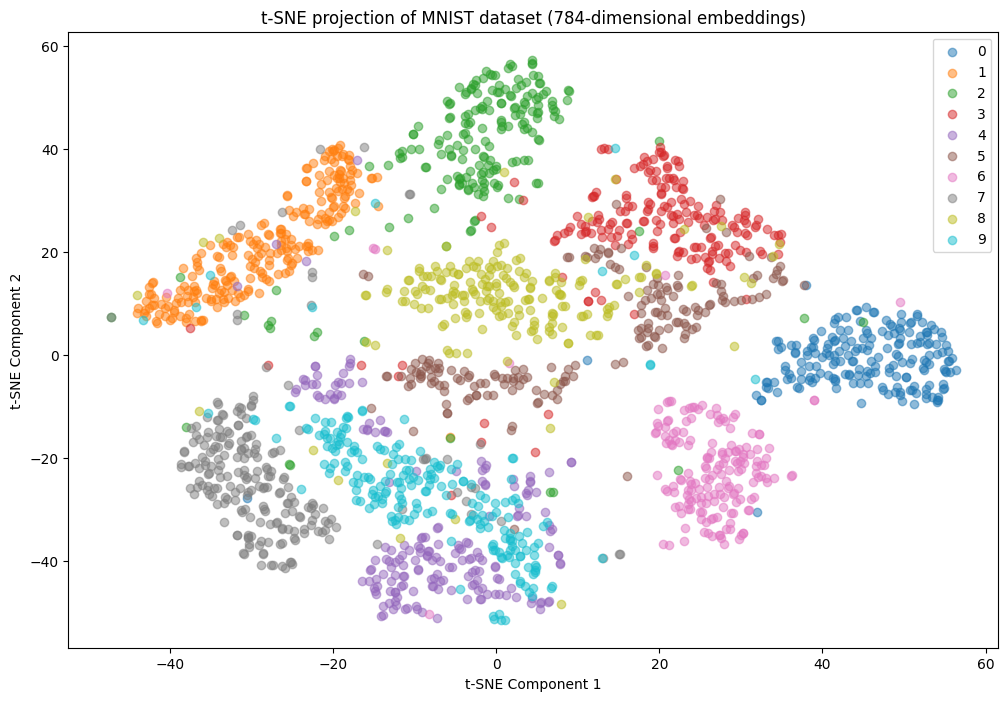

In [35]:
intermediate_model = nn.Sequential(nn.Flatten())

# Prepare the data
n_samples = 2000
total = 0
intermediate_output = []
tmp_labels = []
for data in test_dataloader:
  images, labels = data
  intermediate_output.extend(intermediate_model(images).cpu().detach().numpy())
  tmp_labels.extend(labels)

intermediate_output = np.array(intermediate_output)
tmp_labels = np.array(tmp_labels)

indices = np.random.choice(len(intermediate_output), n_samples, replace=False)
images_subset = intermediate_output[indices]
labels_subset = tmp_labels[indices]

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(images_subset)

# Plot the t-SNE results
plt.figure(figsize=(12, 8))
for label in np.unique(labels_subset):
    indices = labels_subset == label
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=label, alpha=0.5)
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE projection of MNIST dataset (784-dimensional embeddings)')
plt.show()


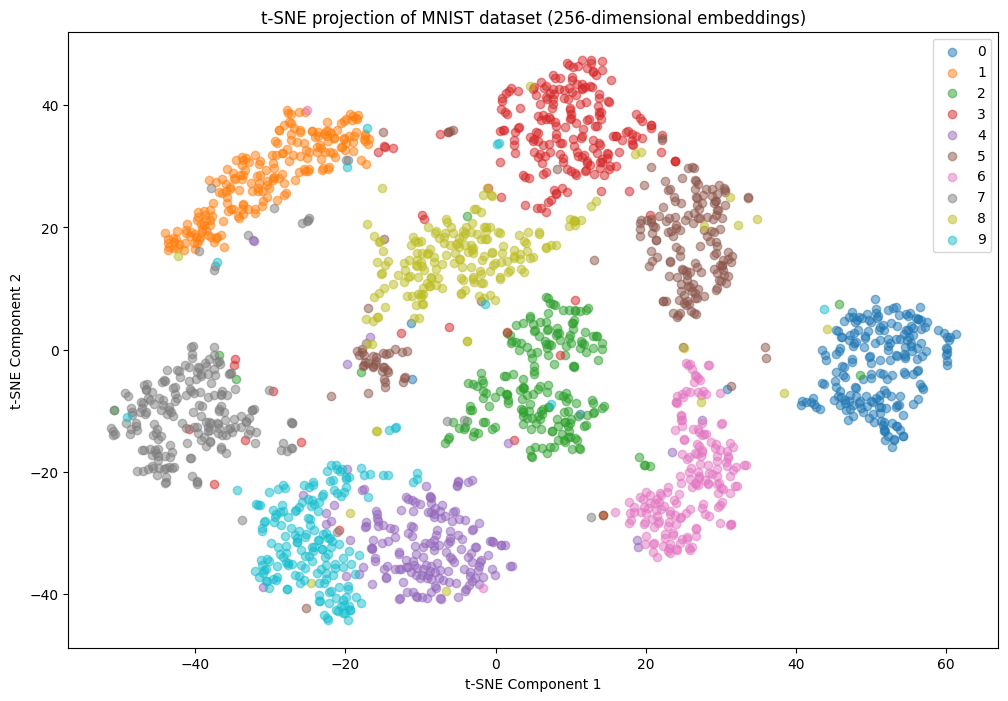

In [36]:
intermediate_model = nn.Sequential(*list(model.children())[:-4])

# Prepare the data
n_samples = 2000
total = 0
intermediate_output = []
tmp_labels = []
for data in test_dataloader:
  images, labels = data
  images = images.to(device)
  intermediate_output.extend(intermediate_model(images).cpu().detach().numpy())
  tmp_labels.extend(labels)

intermediate_output = np.array(intermediate_output)
tmp_labels = np.array(tmp_labels)

indices = np.random.choice(len(intermediate_output), n_samples, replace=False)
images_subset = intermediate_output[indices]
labels_subset = tmp_labels[indices]

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(images_subset)

# Plot the t-SNE results
plt.figure(figsize=(12, 8))
for label in np.unique(labels_subset):
    indices = labels_subset == label
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=label, alpha=0.5)
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE projection of MNIST dataset (256-dimensional embeddings)')
plt.show()


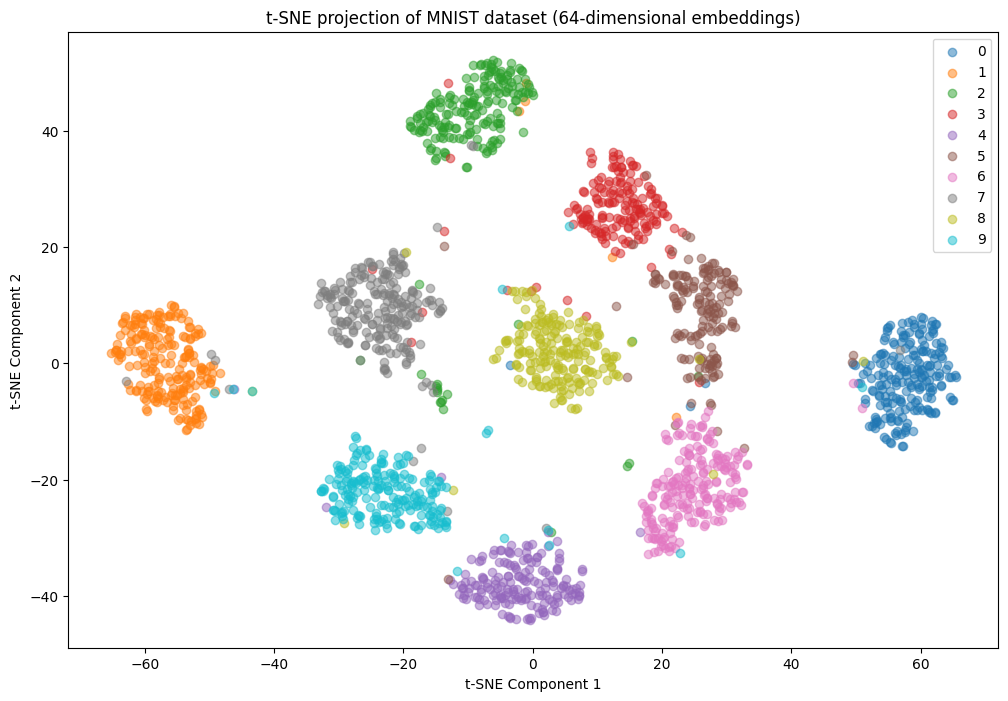

In [37]:
intermediate_model = nn.Sequential(*list(model.children())[:-2])

# Prepare the data
n_samples = 2000
total = 0
intermediate_output = []
tmp_labels = []
for data in test_dataloader:
  images, labels = data
  images = images.to(device)
  intermediate_output.extend(intermediate_model(images).cpu().detach().numpy())
  tmp_labels.extend(labels)

intermediate_output = np.array(intermediate_output)
tmp_labels = np.array(tmp_labels)

indices = np.random.choice(len(intermediate_output), n_samples, replace=False)
images_subset = intermediate_output[indices]
labels_subset = tmp_labels[indices]

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(images_subset)

# Plot the t-SNE results
plt.figure(figsize=(12, 8))
for label in np.unique(labels_subset):
    indices = labels_subset == label
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=label, alpha=0.5)
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE projection of MNIST dataset (64-dimensional embeddings)')
plt.show()


**문제 13**

결과를 분석해보세요! : layer를 통과할수록 같은 label이면 더 응집되어 있고, 다른 label과 경계가 명확히 생긴다.

# 문제 14, 15, 16. Part VII. Optimizer

* Optimizer에는 굉장히 많은 종류가 있죠. 저희는 오늘 그 중에서 SGD / Momentum / RMSprop / Adam 이렇게 4개의 optimizer를 비교해 보려고 합니다.

* 결과를 시각화한 자료를 보고 마음껏 분석해주세요!

---
SGD와 Momentum을 비교하는 코드입니다.

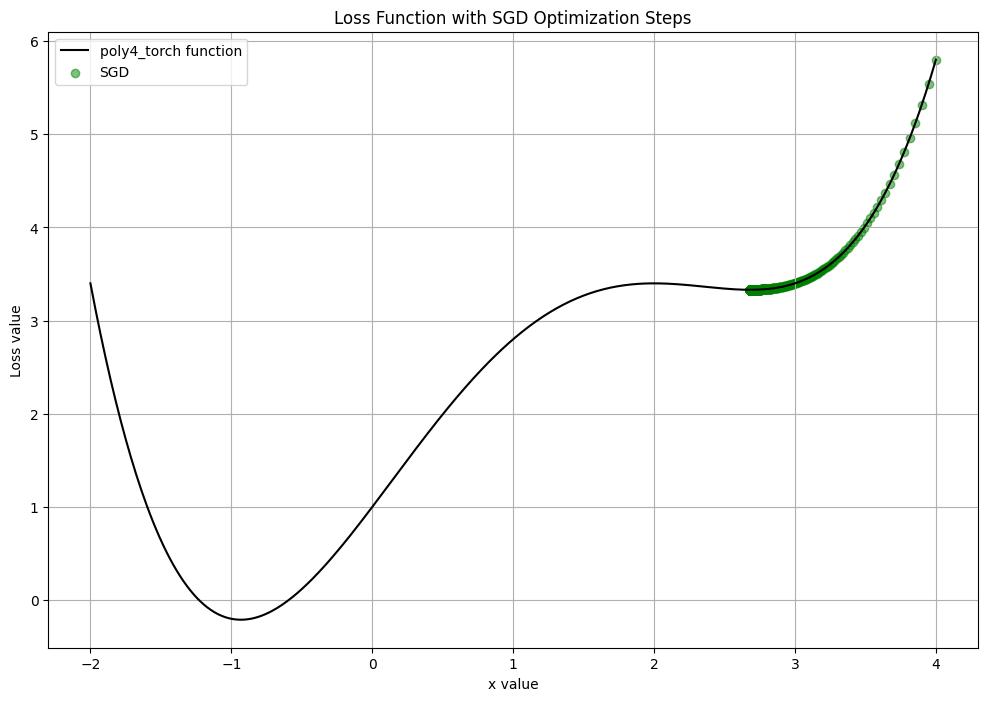

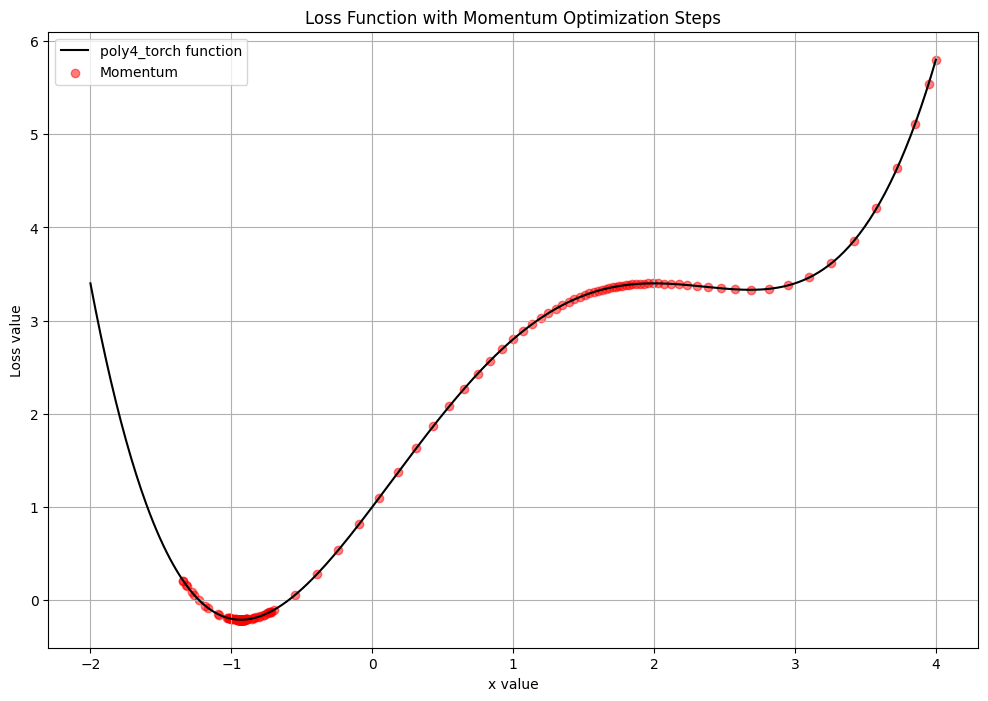

In [ ]:
def poly4_torch(x):
    return 0.1 * x**4 - 0.5 * x**3 + 0.2 * x**2 + 2 * x + 1

x_init = 4.0
x_sgd = torch.tensor([x_init], requires_grad=True)
x_momentum = torch.tensor([x_init], requires_grad=True)

optimizer_sgd = optim.SGD([x_sgd], lr=0.01)
optimizer_momentum = optim.SGD([x_momentum], lr=0.01, momentum=0.9)

iterations = 1000

x_values_sgd = [x_sgd.item()]
x_values_momentum = [x_momentum.item()]

loss_values_sgd = [poly4_torch(x_sgd).item()]
loss_values_momentum = [poly4_torch(x_momentum).item()]

for _ in range(iterations):

    optimizer_sgd.zero_grad()
    loss_sgd = poly4_torch(x_sgd)
    loss_sgd.backward()
    optimizer_sgd.step()
    x_values_sgd.append(x_sgd.item())
    loss_values_sgd.append(loss_sgd.item())

    optimizer_momentum.zero_grad()
    loss_momentum = poly4_torch(x_momentum)
    loss_momentum.backward()
    optimizer_momentum.step()
    x_values_momentum.append(x_momentum.item())
    loss_values_momentum.append(loss_momentum.item())

x_range = torch.linspace(-2, 4, 500)
y_range = poly4_torch(x_range).detach().numpy()

def plot_optimizer(x_values, label, color):
    plt.figure(figsize=(12, 8))
    plt.plot(x_range, y_range, label='poly4_torch function', color='black')
    plt.scatter(x_values, [poly4_torch(torch.tensor(x)).item() for x in x_values], label=label, color=color, alpha=0.5)
    plt.xlabel('x value')
    plt.ylabel('Loss value')
    plt.title(f'Loss Function with {label} Optimization Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_optimizer(x_values_sgd, 'SGD', 'green')
plot_optimizer(x_values_momentum, 'Momentum', 'red')

**문제 14**

* 다음과 같은 그래프가 그려지는 이유를 설명해주세요 : SGD는 미니배치를 보고 파라미터를 업데이트 하기 때문에 극솟값에 빠지는 위험성이 있는 반면, momentum은 관성을 이용해서 내려오던 방향으로 더 가서 local minima에 빠지는 문제를 해결하였다.

Momentum과 Adam을 비교하는 코드입니다.

100%|██████████| 10000/10000 [00:20<00:00, 486.62it/s]
/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


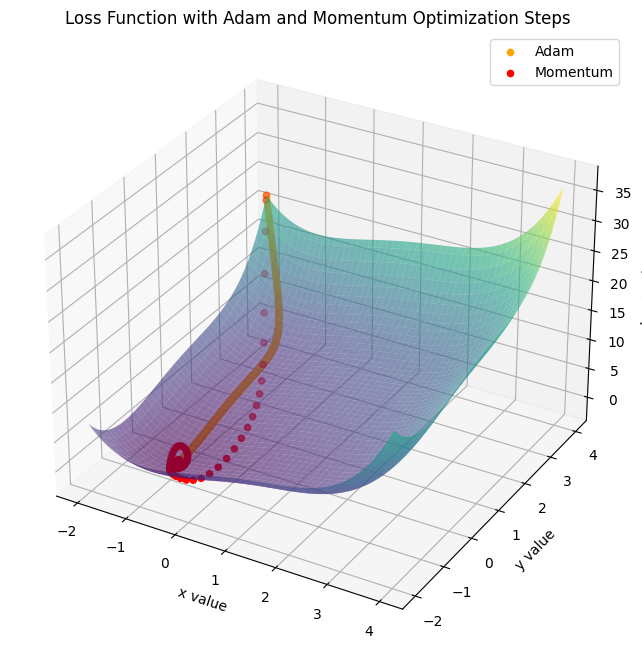

In [ ]:
def poly2d_torch(x, y):
    return 0.15 * (x**4 + y**4) - 0.5 * (x**3 + y**3) + 0.2 * (x**2 + y**2) + 2 * (x + y) + 1

x_init = torch.tensor([-2.0], requires_grad=True)
y_init = torch.tensor([4.0], requires_grad=True)

x_adam = x_init.clone().detach().requires_grad_(True)
y_adam = y_init.clone().detach().requires_grad_(True)

x_momentum = x_init.clone().detach().requires_grad_(True)
y_momentum = y_init.clone().detach().requires_grad_(True)

optimizer_adam = optim.Adam([x_adam, y_adam], lr=0.01)
optimizer_momentum = optim.SGD([x_momentum, y_momentum], lr=0.01, momentum=0.9)

iterations = 10000

x_values_adam = [x_adam.item()]
y_values_adam = [y_adam.item()]
loss_values_adam = [poly2d_torch(x_adam, y_adam).item()]

x_values_momentum = [x_momentum.item()]
y_values_momentum = [y_momentum.item()]
loss_values_momentum = [poly2d_torch(x_momentum, y_momentum).item()]

for _ in tqdm(range(iterations)):
    optimizer_adam.zero_grad()
    loss_adam = poly2d_torch(x_adam, y_adam)
    loss_adam.backward()
    optimizer_adam.step()
    x_values_adam.append(x_adam.item())
    y_values_adam.append(y_adam.item())
    loss_values_adam.append(loss_adam.item())

    optimizer_momentum.zero_grad()
    loss_momentum = poly2d_torch(x_momentum, y_momentum)
    loss_momentum.backward()
    optimizer_momentum.step()
    x_values_momentum.append(x_momentum.item())
    y_values_momentum.append(y_momentum.item())
    loss_values_momentum.append(loss_momentum.item())

x_range = torch.linspace(-2, 4, 100)
y_range = torch.linspace(-2, 4, 100)
X, Y = torch.meshgrid(x_range, y_range)
Z = poly2d_torch(X, Y).detach().numpy()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.numpy(), Y.numpy(), Z, cmap='viridis', alpha=0.6)

ax.scatter(x_values_adam, y_values_adam, loss_values_adam, label='Adam', color='orange')
ax.scatter(x_values_momentum, y_values_momentum, loss_values_momentum, label='Momentum', color='red')

ax.set_xlabel('x value')
ax.set_ylabel('y value')
ax.set_zlabel('Loss value')
ax.set_title('Loss Function with Adam and Momentum Optimization Steps')
ax.legend()

plt.show()


**문제 15**

* 다음과 같은 그래프가 그려지는 이유를 설명해주세요 (인터넷에 검색하셔도 좋습니다!): adam은 momentum과 비슷하게 떨어지지만 학습의 갱신 강도를 적응적으로 조정하기 때문에 minima에 도달하면 더 크게 움직이지 않고 그 자리를 유지하려고 한다.

Training with RMSProp optimizer


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Epoch 1, Iteration 0, loss = 2.2957
Epoch 1, Iteration 100, loss = 0.5109
Epoch 1, Iteration 200, loss = 0.3130
Epoch 1, Iteration 300, loss = 0.3512
Epoch 1, Iteration 400, loss = 0.1558
Epoch 1, Iteration 500, loss = 0.2536
Epoch 1, Iteration 600, loss = 0.1759
Epoch 1, Iteration 700, loss = 0.2440
Epoch 2, Iteration 0, loss = 0.1359
Epoch 2, Iteration 100, loss = 0.1921
Epoch 2, Iteration 200, loss = 0.1420
Epoch 2, Iteration 300, loss = 0.1517
Epoch 2, Iteration 400, loss = 0.0806
Epoch 2, Iteration 500, loss = 0.1622
Epoch 2, Iteration 600, loss = 0.0525
Epoch 2, Iteration 700, loss = 0.1112
Epoch 3, Iteration 0, loss = 0.1373
Epoch 3, Iteration 100, loss = 0.0823
Epoch 3, Iteration 200, loss = 0.1583
Epoch 3, Iteration 300, loss = 0.1303
Epoch 3, Iteration 400, loss = 0.1949
Epoch 3, Iteration 500, loss = 0.0181
Epoch 3, Iteration 600, loss = 0.1392
Epoch 3, Iteration 700, loss = 0.1511
Epoch 4, Iteration 0, loss = 0.1403
Epoch 4, Iteration 100, loss = 0.0855
Epoch 4, Iteration 2

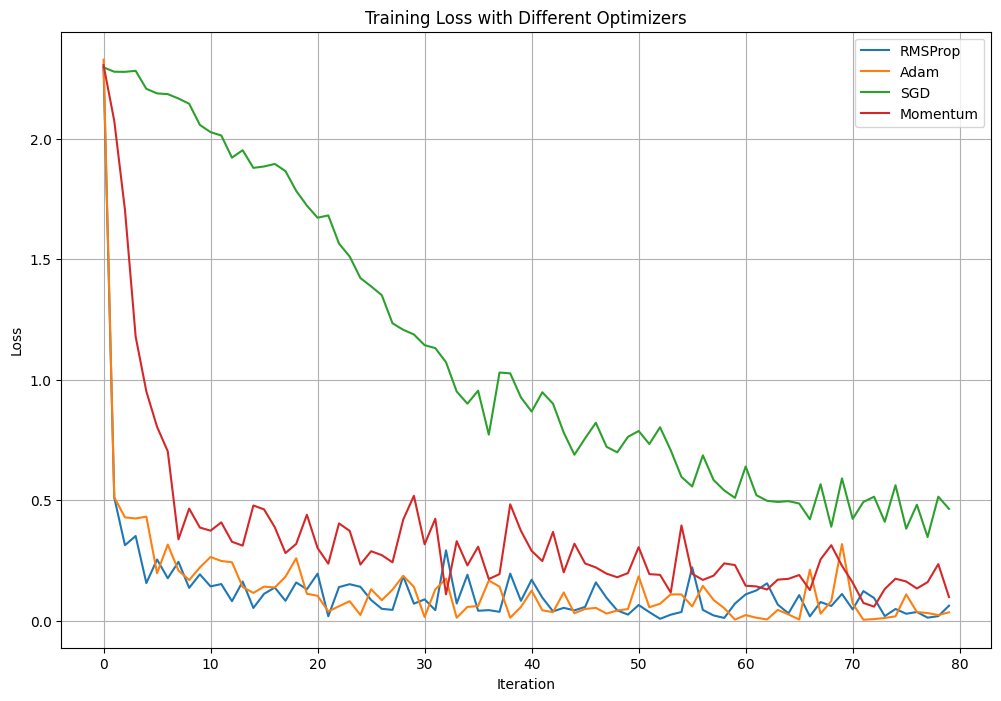

In [12]:
learning_rate = 0.001

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Training function
def train_part34(model, criterion, optimizer, epochs=10):
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    train_loss = []
    for e in range(epochs):
        for t, (x, y) in enumerate(train_dataloader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=torch.float)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = criterion(scores, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if t % print_every == 0:
                print(f'Epoch {e+1}, Iteration {t}, loss = {loss.item():.4f}')
                train_loss.append(loss.item())
    return train_loss

# Initialize models and optimizers
optimizers = {
    'RMSProp': optim.RMSprop,
    'Adam': optim.Adam,
    'SGD': optim.SGD,
    'Momentum': lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9)
}
criterion = nn.CrossEntropyLoss()

# Train models and collect loss
losses = {}
for opt_name, opt_class in optimizers.items():
    print(f"Training with {opt_name} optimizer")
    model = SimpleModel()
    optimizer = opt_class(model.parameters(), lr=learning_rate)
    losses[opt_name] = train_part34(model, criterion, optimizer)

# Plotting the losses
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for opt_name, loss in losses.items():
    plt.plot(loss, label=opt_name)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss with Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()


**문제 16**

* 결과를 마음껏 분석해주세요: 4개의 옵티마이저 모두 iteration이 증가할 수록 loss 값이 감소한다. SGD는 다른 옵티마이저에 비해 성능이 loss 값이 높고 감소 추세가 완만하다. 이는 데이터의 일부분만을 보게 되면서 local minima에 빠지게 되기 때문이다. momentum이 그 문제를 해결했으나 minma 근처에서 멈추는 것이 힘들기 때문에 adam, RMSProp에 비해 loss 값이 높다. RMSProp는 지수이동평균을 이용하여 Gradient 누적시 최근 것을 더 크게 반영할 수 있도록 하는데, adam은 RMSProp와 Momentum의 개념을 섞어 성능을 좋게 하였다. 실제로 그래프를 보면 iteration이 20이 넘어가면 RMSProp보다 전반적으로 loss 값이 적게 나온다.

# 문제 17, 18.Part VIII 자신만의 모델 만들기!

* 이제 위에서 배운 내용을 바탕으로 자유롭게 모델을 만들어주세요!
* 1등하시는 분께 과제 제작자인 '김민영'님이 커피 쿠폰을 드립니다! (공동 1등  시 먼저 과제를 제출하신 분께 커피 쿠폰을 드리도록 하겠습니다.)

**문제 17**


In [16]:
learning_rate =1e-4
model = nn.Sequential(
nn.Flatten(), nn.Linear(784, 512), nn.LeakyReLU(), nn.Linear(512, 128), nn.LeakyReLU(), nn.Linear(128, 32), nn.LeakyReLU(), nn.Linear(32,10)
)
optimizer = optim.NAdam(model.parameters(), lr= learning_rate)
epochs = 20

train_part34(model, optimizer, epochs)

Iteration 0, loss = 2.2893
Checking accuracy on validation set
Got 1197 / 12000 correct (9.98)

Iteration 100, loss = 1.2119
Checking accuracy on validation set
Got 8027 / 12000 correct (66.89)

Iteration 200, loss = 0.6564
Checking accuracy on validation set
Got 9736 / 12000 correct (81.13)

Iteration 300, loss = 0.4565
Checking accuracy on validation set
Got 10200 / 12000 correct (85.00)

Iteration 400, loss = 0.4410
Checking accuracy on validation set
Got 10474 / 12000 correct (87.28)

Iteration 500, loss = 0.4889
Checking accuracy on validation set
Got 10564 / 12000 correct (88.03)

Iteration 600, loss = 0.3684
Checking accuracy on validation set
Got 10622 / 12000 correct (88.52)

Iteration 700, loss = 0.3946
Checking accuracy on validation set
Got 10661 / 12000 correct (88.84)

Iteration 0, loss = 0.3590
Checking accuracy on validation set
Got 10689 / 12000 correct (89.08)

Iteration 100, loss = 0.2472
Checking accuracy on validation set
Got 10792 / 12000 correct (89.93)

Iteratio

* 밑의 코드에서 높은 Score를 얻으신 분이 1등입니다. 위에는 아무상관없습니다~

In [17]:
check_accuracy_part34(test_dataloader, model, istrain=False)

Checking accuracy on test set
Got 9735 / 10000 correct (97.35)


**문제 18**
* 자신의 모델에 대해 설명해주세요~
성능을 더 내기 위해 4계층으로 만들어보았습니다. 활성화 함수로는 dead ReLu problem을 해결하기 위해 leakyrelu를 사용했습니다. 옵티마이저로는 NAdam을 사용하여 4계층으로 늘어난 만큼 학습의 가속성을 위해 선택하였으며, adam보다 안정적이라고 하여 선택하게 되었습니다.

## **수고 하셨습니다~~**